## **Hypothesis Testing in Healthcare: Drug Safety**

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset drug_safety.csv was obtained from Hbiostat courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects adverse_effects and the number of adverse effects in a single individual num_effects.

The columns in the modified dataset are:

Column	Description
- sex	The gender of the individual
- age	The age of the individual
- week	The week of the drug testing
- trx	The treatment (Drug) and control (Placebo) groups
- wbc	The count of white blood cells
- rbc	The count of red blood cells
- adverse_effects	The presence of at least a single adverse effect

Your organization has asked you to explore and answer some questions from the data collected.

In [1]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=6f18803e67a7b82ef7687dc13d20a51bf712750fc9ecb33ba9316435dd06848d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [2]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("/content/drive/MyDrive/drug_safety.csv")

In [3]:
data = drug_safety.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


In [8]:
# Function to separate the fields into various datatypes

def separate_fields(data):

  cat_cols = []
  num_cols = []

  for col in data.columns:
    if data[col].dtype == 'int':
      num_cols.append(col)
    else:
      cat_cols.append(col)

  return cat_cols,num_cols


In [9]:
separate_fields(data)

(['sex', 'trx', 'wbc', 'rbc', 'adverse_effects'],
 ['age', 'week', 'num_effects'])

In [11]:
cat_cols,num_cols = separate_fields(data)

In [12]:
print(f"Categorical Columns : {len(cat_cols)} : {cat_cols}")
print(f"Numerical Columns : {len(num_cols)} : {num_cols}")

Categorical Columns : 5 : ['sex', 'trx', 'wbc', 'rbc', 'adverse_effects']
Numerical Columns : 3 : ['age', 'week', 'num_effects']


In [18]:
data.columns.values

array(['age', 'sex', 'trx', 'week', 'wbc', 'rbc', 'adverse_effects',
       'num_effects'], dtype=object)

**Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups.**

**Two Sample proportions test**

- Null Hypothesis : The proportion of adverse effects is the same across both the Drug and Placebo groups.
- Alternative Hypothesis : The proprtion of adverse effects is different between the Drug and Placebo groups.
- Significance level : 0.05

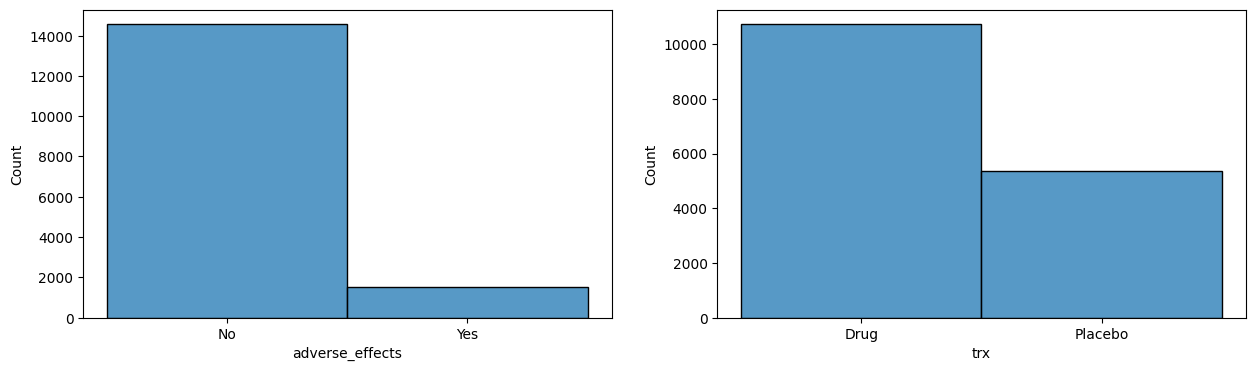

In [26]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data['adverse_effects'],ax=ax[0])
sns.histplot(data['trx'],ax=ax[1])
plt.show()

In [ ]:
# Count for adverse effects for each group

phats = data.groupby('trx')['adverse_effects'].value_counts()
phats

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64

In [ ]:
# Number of samples for each category

n = data.groupby('trx')['adverse_effects'].count()
n

trx
Drug       10727
Placebo     5376
Name: adverse_effects, dtype: int64

In [ ]:
# Grabbing where adverse_effects = 'yes'

yes_Drug = phats[('Drug','Yes')]
yes_Placebo = phats[('Placebo','Yes')]
print(yes_Drug)
print(yes_Placebo)

1024
512


In [ ]:
# Grabbing the counts for our categories

samples_Drug = n[('Drug')]
samples_Placebo = n[('Placebo')]

print(samples_Drug)
print(samples_Placebo)

10727
5376


In [ ]:
n_adverse_effets_yes = np.array([yes_Drug,yes_Placebo])
n_rows = np.array([samples_Drug,samples_Placebo])

In [ ]:
# performing a two-sided z test on the two proportions

from statsmodels.stats.proportion import proportions_ztest

z_score,p_value = proportions_ztest(count = n_adverse_effets_yes,
                                    nobs = n_rows,
                                    alternative = 'two-sided')

In [ ]:
print(f"Z_Score : {z_score}")
print(f"p_value : {p_value}")

Z_Score : 0.0452182684494942
p_value : 0.9639333330262475


- We do not have sufficient evidence to reject the null hypothesis.
-  The results suggest that the data does not provide strong evidence that the drug has a different effect on adverse effects on the Drug and Placebo groups.
- This means that the proportion of adverse effects on both groups is statistically the same.

**Are the 'number of effects' and groups(trx) independent?**

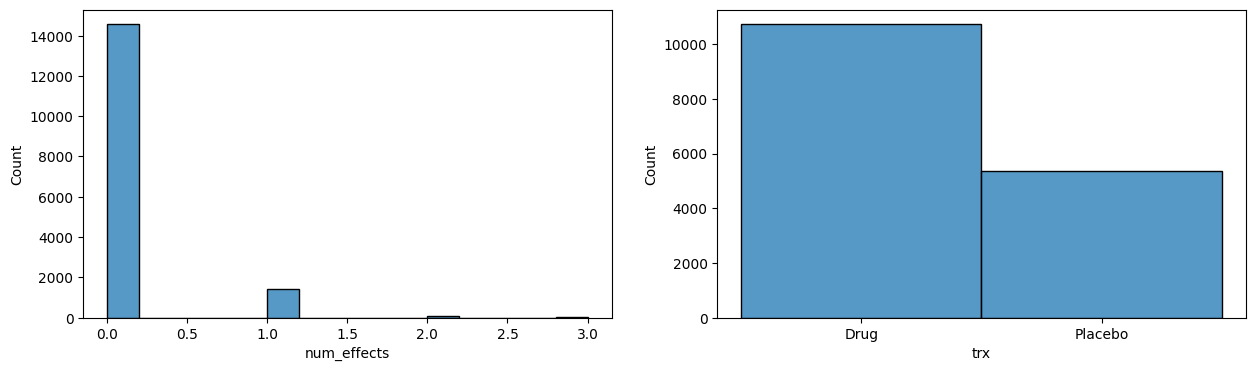

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data['num_effects'],ax=ax[0])
sns.histplot(data['trx'],ax=ax[1])
plt.show()

In [ ]:
data['num_effects'].value_counts()

0    14567
1     1442
2       88
3        6
Name: num_effects, dtype: int64

In [ ]:
data.groupby('trx')['num_effects'].value_counts()

trx      num_effects
Drug     0              9703
         1               956
         2                63
         3                 5
Placebo  0              4864
         1               486
         2                25
         3                 1
Name: num_effects, dtype: int64

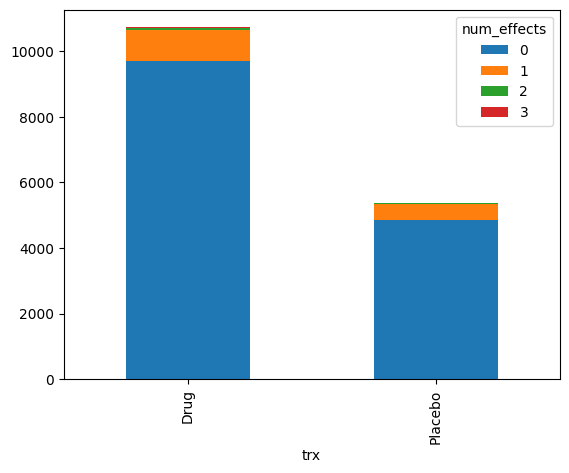

In [ ]:
grouped = data.groupby('trx')['num_effects'].value_counts()
wide = grouped.unstack()
wide.plot(kind='bar',stacked=True)
plt.show()

**Conducting chi2 test of independence**

- Null Hypothesis - There is no association between Number of Effects and the Drug and Placebo groups.
- Alternative Hypothesis - There is an association between the Number of Effects and the Drug and Placebo groups.

In [ ]:
# Conducting a chi2 test for independence
# We'll apply the Yate's correction given some of our group counts are less than 5

expected, observed, stats = pingouin.chi2_independence(data=data,
                           x='num_effects',
                           y='trx',
                           correction=True)

In [ ]:
print(stats[stats['test'] == 'pearson'])

      test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  1.799644  3.0  0.615012  0.010572  0.176275


- The p-value is 0.615012, which is greater than 0.05.
- Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant association between the two variables.

**Is there any statistically significant difference in age between the groups?**

- Visualize the distribution of age in both groups
- Does it follow a normal distribution?

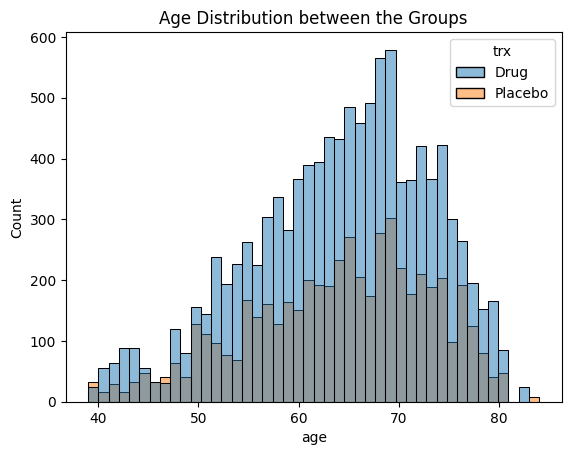

In [ ]:
sns.histplot(data=data, x="age", hue="trx")
plt.title('Age Distribution between the Groups')
plt.show()

- The data appears to be skewed to the left.
- Let's conduct a noramlity test to be sure.

In [ ]:
pingouin.normality(data=data,dv='age',group='trx',method='shapiro',alpha=0.5)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
trx,,,
Drug,0.976785,2.189152e-38,False
Placebo,0.975595,2.224950e-29,False


In this case, the p-values for both the Drug and Placebo groups are very small (less than 0.001). This means that there is very strong evidence to reject the null hypothesis that the data comes from a normally distributed population. In other words, the data for both groups is not normally distributed.

In [ ]:
# age and trx(categorical)

In [ ]:
df = data[['trx','age']]
df_wide = df.pivot(columns='trx',values='age')
df_wide.head()

trx,Drug,Placebo
0,62.0,NaN
1,62.0,NaN
2,62.0,NaN
3,62.0,NaN
4,62.0,NaN


- We'll conduct a non-parametric test as the data does not mean normality.


- Null hypothesis - There is no difference in ages between the Drug and Placebo groups.
- Alternative hypothesis - There is a significant difference in the ages between the Drug and Placebo groups.

In [ ]:
alpha = 0.01

pingouin.mwu(x=df_wide['Drug'],y=df_wide['Placebo'],alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,29149339.5,two-sided,0.256963,-0.01093,0.505465


- The p-value (0.256963) is greater than the significance level (0.05), which means that we fail to reject the null hypothesis.
- This means that there is not enough evidence to conclude that there is a statistically significant difference between the ages of the two groups.